In [26]:
!pip install tensorflow opencv-python-headless scikit-learn matplotlib
!pip install gtts keras pillow

In [2]:
import zipfile
import os
zip_path = '/content/archive.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
os.listdir('/content/')


['.config', 'Detect_solar_dust', 'archive.zip', 'sample_data']

In [29]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
import time

# Load data
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for image_name in os.listdir(label_folder):
                img_path = os.path.join(label_folder, image_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (150, 150))
                img = img / 255.0
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

data_folder = '/content/Detect_solar_dust'

images, labels = load_images_from_folder(data_folder)

encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation = 'relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

model.save('solar_panel_fault_model.keras')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │      17,280,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,321,473 (66.08 MB)

 Trainable params: 17,321,473 (66.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.4942 - loss: 5.9176 - val_accuracy: 0.5504 - val_loss: 1.5288
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5100 - loss: 2.7198 - val_accuracy: 0.4622 - val_loss: 1.4222
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5386 - loss: 1.3098 - val_accuracy: 0.5798 - val_loss: 0.6934
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5639 - loss: 0.8185 - val_accuracy: 0.6429 - val_loss: 0.6262
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6331 - loss: 0.6217 - val_accuracy: 0.7311 - val_loss: 0.5736
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6248 - loss: 0.6365 - val_accuracy: 0.5756 - val_loss: 0.6402
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6269 - loss: 0.6268 - val_accuracy: 0.7101 - val_loss: 0.5667
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6323 - loss: 0.6255 - val_accuracy: 0.6765 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


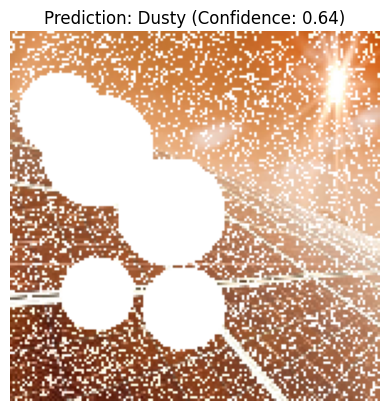

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


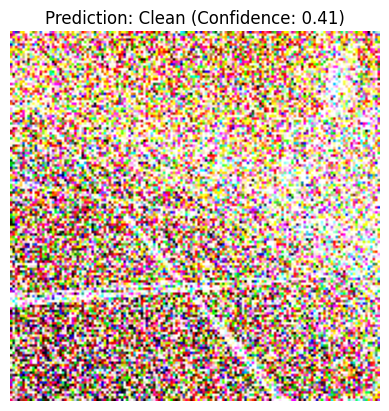

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


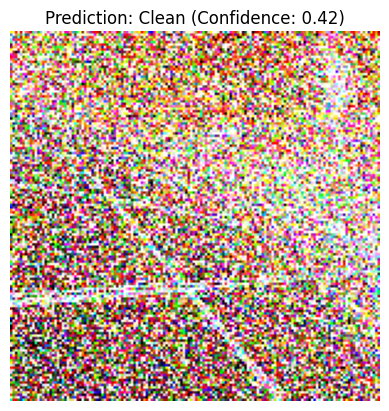

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


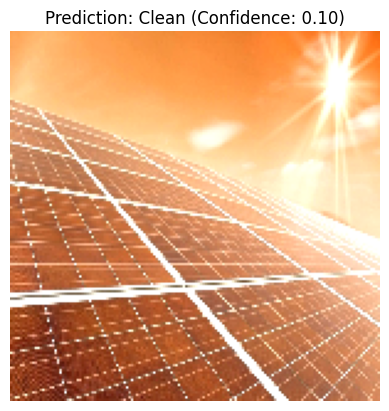

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


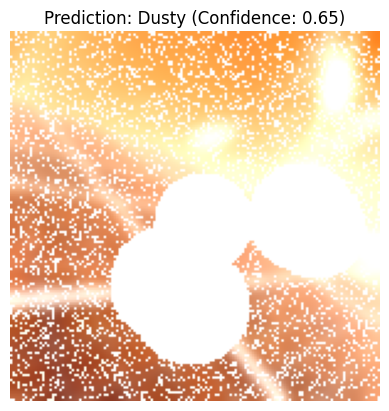

In [37]:
def generate_synthetic_images(image, num_images=5):
    synthetic_images = []
    for _ in range(num_images):
        img = image.copy()


        if np.random.rand() > 0.5:
            img = cv2.GaussianBlur(img, (15, 15), 0) # blur

        if np.random.rand() > 0.5:
            noise = np.random.normal(0, 0.5, img.shape)  # noise
            img = np.clip(img + noise, 0, 1)

        if np.random.rand() > 0.5:
            img = np.clip(img * (0.5 + np.random.uniform(0.5, 2)), 0, 1)  #  brightness change

        if np.random.rand() > 0.5:
            snow = np.random.choice([0, 1], size=img.shape[:2], p=[0.8, 0.2])  #  snow
            snow = np.repeat(snow[:, :, np.newaxis], 3, axis=2)
            img = np.clip(img + snow * 0.8, 0, 1)

        if np.random.rand() > 0.5:
            for _ in range(6):  #  bird droppings
                x, y = np.random.randint(0, img.shape[1]), np.random.randint(0, img.shape[0])
                radius = np.random.randint(15, 25)
                cv2.circle(img, (x, y), radius, (1, 1, 1), -1)

        synthetic_images.append(img)
    return np.array(synthetic_images)

generated_images = generate_synthetic_images(test_image, num_images=5)

for i, img in enumerate(generated_images):
    img_input = np.expand_dims(img, axis=0)
    prediction = model.predict(img_input)[0][0]
    label = 'Dusty' if prediction > 0.5 else 'Clean'

    img_to_save = np.uint8(img * 255)
    image_filename = os.path.join(output_folder, f"synthetic_image_{i+1}_{label}.jpg")
    cv2.imwrite(image_filename, img_to_save)

    plt.imshow(img)
    plt.title(f"Prediction: {label} (Confidence: {prediction:.2f})")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


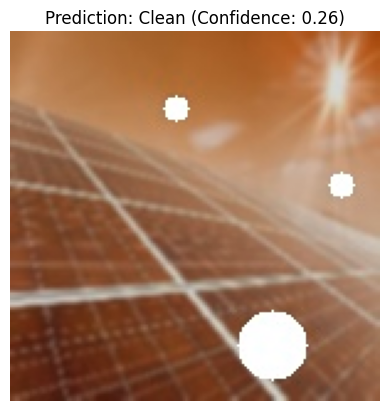

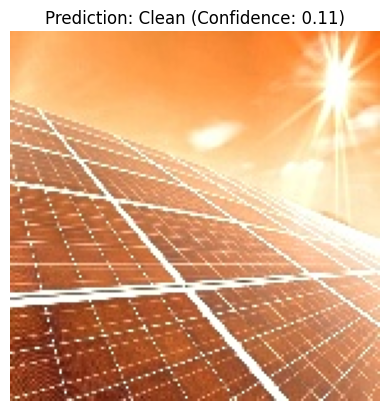

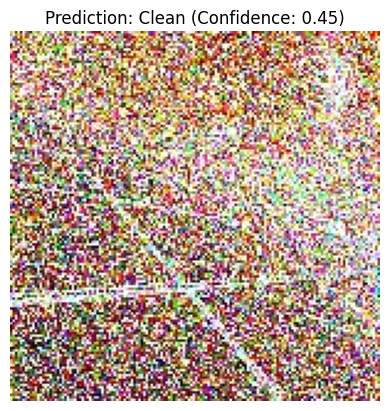

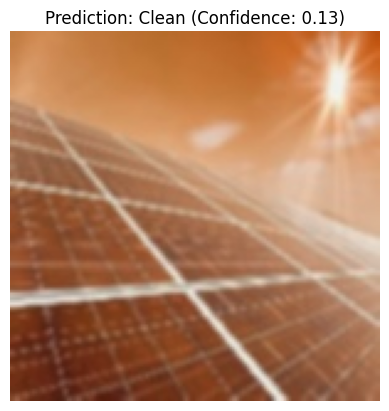

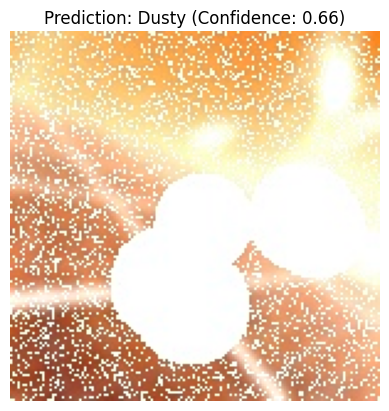

⚠️ Fault Detected: Dusty - Please check the solar panel.


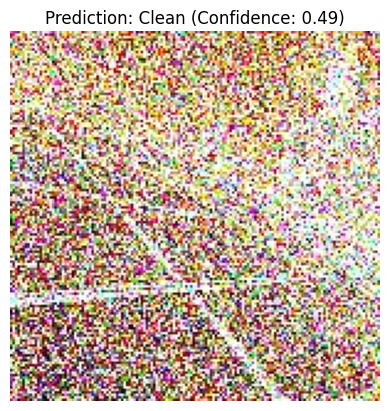

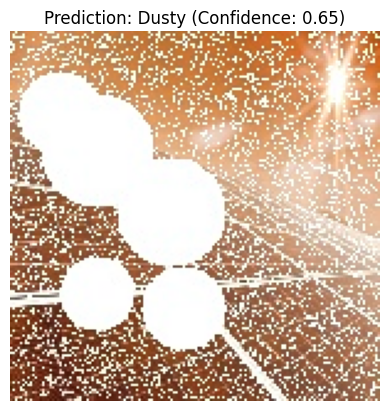

⚠️ Fault Detected: Dusty - Please check the solar panel.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



In [39]:
import threading
from gtts import gTTS
from keras.models import load_model

# play speech notification
def play_speech_notification(message):
    tts = gTTS(text=message, lang='en', slow=False)
    tts.save("notification.mp3")
    display(Audio("notification.mp3", autoplay=True))
    os.remove("notification.mp3")

#  notify when a fault is detected
def notify_if_fault_detected(prediction, image_label='Dusty'):
    if prediction > 0.5:
        print(f"⚠️ Fault Detected: {image_label} - Please check the solar panel.")
        message = f"Warning: {image_label} detected. Please check the solar panel."
        play_speech_notification(message)

        # reminder after 1 hour (3600 seconds)
        threading.Timer(3600, remind_user_to_check).start()

# function to notify user
def remind_user_to_check():
    message = "Reminder: Please check the solar panels for dust or other faults."
    print("⏰ Reminder: Please check the solar panels for dust or other faults.")
    play_speech_notification(message)


def load_generated_images_from_folder(folder_path, target_size=(150, 150)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            img = img / 255.0
            images.append(img)

            # Determine label from filename
            label = 'Dusty' if 'dusty' in filename.lower() else 'Clean'
            labels.append(label)
    return np.array(images), labels

model = load_model('/content/solar_panel_fault_model.keras')

folder_path = '/content/generated_images'

generated_images, generated_labels = load_generated_images_from_folder(folder_path)

prediction = model.predict(generated_images)

# Loop through the predictions and test data
for i, img in enumerate(generated_images):
    img_input = np.expand_dims(img, axis=0)
    prediction_value = prediction[i][0]


    label = 'Dusty' if prediction_value > 0.5 else 'Clean'

    plt.imshow(img)
    plt.title(f"Prediction: {label} (Confidence: {prediction_value:.2f})")
    plt.axis('off')
    plt.show()

    notify_if_fault_detected(prediction_value, label)

# Keep the program running
while True:
    time.sleep(1)
